In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings,re
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sns
from matplotlib.gridspec import GridSpec

In [2]:
resumeData = pd.read_csv('/content/UpdatedResumeDataSet.csv')
print("Structure of Dataset\n\n",resumeData.head(),"\n\n")
print("Shape of Dataset:", resumeData.shape,"\n\n")
print("Dataset Null Vals:\n\n", resumeData.info())

Structure of Dataset

        Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab... 


Shape of Dataset: (962, 2) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
Dataset Null Vals:

 None


In [3]:
print("Distinct Categories:")
for i,j in zip(resumeData['Category'].unique(), resumeData['Category'].value_counts(sort=False)):
  print(i,": ",j)

Distinct Categories:
Data Science :  40
HR :  44
Advocate :  20
Arts :  36
Web Designing :  45
Mechanical Engineer :  40
Sales :  40
Health and fitness :  30
Civil Engineer :  24
Java Developer :  84
Business Analyst :  28
SAP Developer :  24
Automation Testing :  26
Electrical Engineering :  30
Operations Manager :  40
Python Developer :  48
DevOps Engineer :  55
Network Security Engineer :  25
PMO :  30
Database :  33
Hadoop :  42
ETL Developer :  40
DotNet Developer :  28
Blockchain :  40
Testing :  70


In [4]:
resumeData['Category'].value_counts(sort=False).index

Index(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness', 'Civil Engineer',
       'Java Developer', 'Business Analyst', 'SAP Developer',
       'Automation Testing', 'Electrical Engineering', 'Operations Manager',
       'Python Developer', 'DevOps Engineer', 'Network Security Engineer',
       'PMO', 'Database', 'Hadoop', 'ETL Developer', 'DotNet Developer',
       'Blockchain', 'Testing'],
      dtype='object')

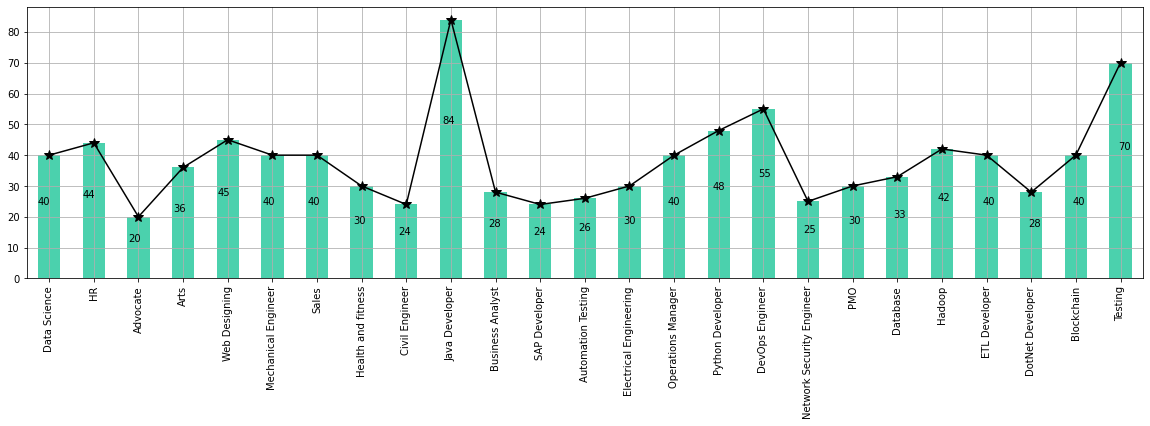

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,5))
resumeData['Category'].value_counts(sort=False).plot(kind='bar', color='#4bd1ad')
resumeData['Category'].value_counts(sort=False).plot(kind='line', marker='*', color='black', ms=10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.008 , p.get_height() * 0.6))
plt.xticks(rotation=90)
plt.grid()
plt.show()

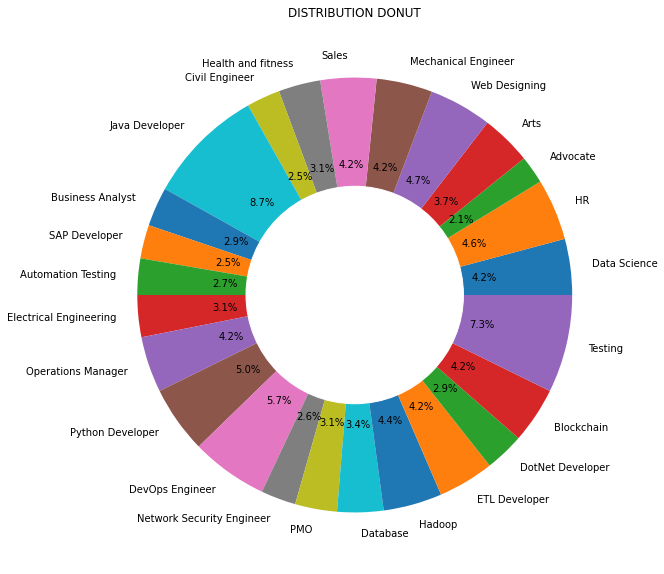

In [6]:
targetVals = resumeData['Category'].value_counts(sort=False)
targetLabs = resumeData['Category'].unique()

plt.figure(1, figsize=(22,22))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='DISTRIBUTION DONUT')

patches, autotexts, source_pie = plt.pie(targetVals, labels=targetLabs, autopct='%1.1f%%')
my_circle = plt.Circle( (0,0), 0.5, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)


#for patch, txt in zip(patches, autotexts):
 #   ang = (patch.theta2 + patch.theta1) / 2.
  #  x = patch.r * 100 * np.cos(ang*np.pi/180)
  #  y = patch.r * 100 * np.sin(ang*np.pi/180)

In [7]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)
    resumeText = re.sub('RT|cc', ' ', resumeText)
    resumeText = re.sub('#\S+', '', resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText) 
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText) 
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)
    return resumeText

resumeData['cleaned_resume'] = resumeData.Resume.apply(lambda x: cleanResume(x))

In [8]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

stopwordsL = set(stopwords.words('english')+['``',"''"])
totalWords = []
[[totalWords.append(w) for w in nltk.word_tokenize(i) if not w.lower() in stopwordsL] for i in resumeData['cleaned_resume'].values]

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('various', 688), ('Data', 674), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632), ('Technologies', 627), ('work', 622), ('client', 611)]


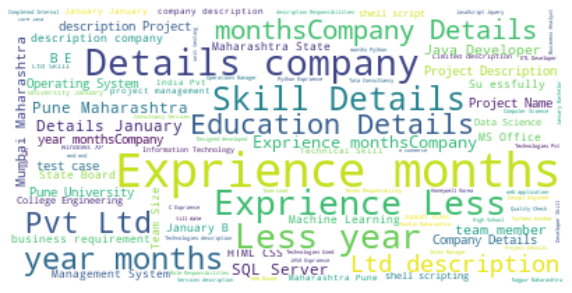

In [9]:
wc = WordCloud(background_color="white").generate((" ").join(totalWords))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

resumeData['Category'] = LabelEncoder().fit_transform(resumeData['Category'])

resumeData.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [34]:
resumeDataOrg = pd.read_csv('/content/UpdatedResumeDataSet.csv')

print("Name - Label - Count")

for i,j,k in zip(resumeDataOrg['Category'].unique(),resumeData['Category'].unique(),resumeData['Category'].value_counts(sort=False)):
  print(i,"- ",j,"- ",k)


#print(resumeDataOrg['Category'].unique()[0],"- ", resumeData['Category'].value_counts())

Name - Label - Count
Data Science -  6 -  40
HR -  12 -  44
Advocate -  0 -  20
Arts -  1 -  36
Web Designing -  24 -  45
Mechanical Engineer -  16 -  40
Sales -  22 -  40
Health and fitness -  14 -  30
Civil Engineer -  5 -  24
Java Developer -  15 -  84
Business Analyst -  4 -  28
SAP Developer -  21 -  24
Automation Testing -  2 -  26
Electrical Engineering -  11 -  30
Operations Manager -  18 -  40
Python Developer -  20 -  48
DevOps Engineer -  8 -  55
Network Security Engineer -  17 -  25
PMO -  19 -  30
Database -  7 -  33
Hadoop -  13 -  42
ETL Developer -  10 -  40
DotNet Developer -  9 -  28
Blockchain -  3 -  40
Testing -  23 -  70


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

word_vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words='english')
word_vectorizer.fit(resumeData['cleaned_resume'].values)
WordFeatures = word_vectorizer.transform(resumeData['cleaned_resume'].values)

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,resumeData['Category'].values,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=resumeData['Category'].values)

print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


In [33]:
clfOvR = OneVsRestClassifier(KNeighborsClassifier())
clfOvR.fit(X_train, y_train)
prediction = clfOvR.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clfOvR.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clfOvR.score(X_test, y_test)))


Accuracy of KNeighbors Classifier on training set: 0.99
Accuracy of KNeighbors Classifier on test set:     0.98


In [35]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

clfOvO = OneVsOneClassifier(SVC())
clfOvO.fit(X_train, y_train)
prediction = clfOvO.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clfOvO.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clfOvO.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 1.00
Accuracy of KNeighbors Classifier on test set:     0.99


In [36]:
print("\n Classification report for classifier %s:\n%s\n" % (clfOvR, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       0.94      1.00      0.

In [37]:
print("\n Classification report for classifier %s:\n%s\n" % (clfOvO, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsOneClassifier(estimator=SVC()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       0.94      1.00      0.97        17
     